# Merging data
This notebook will merge all of the cleaned data into a single geodataframe. 

- county
    - district
        - student grades (english)
        - student grades (math)
        
[pandas merge docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [1]:
import pandas as pd
import geopandas as gpd
# importing packages
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_column', 200)
# setting display option
a = gpd.read_file("clean_data/attributes.shp")
lcff = pd.read_csv("clean_data/lcff.csv")
math = pd.read_csv("clean_data/math.csv")
ela = pd.read_csv("clean_data/ela.csv")
# importing cleaned data

## Shapefile/attribute and lcff (funding data) first

In [2]:
a.shape

(944, 70)

In [3]:
len(a["DistrictNa"].unique())

932

In [4]:
lcff.shape

(944, 8)

In [5]:
len(lcff["districtname"].unique())

932

What's going on here?

In [6]:
a[a.duplicated(['DistrictNa'])]

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictNa,DistrictTy,GradeLow,GradeHigh,GradeLowCe,GradeHighC,AssistStat,CongressUS,SenateCA,AssemblyCA,LocaleDist,UpdateNote,EnrollTota,EnrollChar,EnrollNonC,AAcount,AApct,AIcount,AIpct,AScount,ASpct,FIcount,FIpct,HIcount,HIpct,MRcount,MRpct,PIcount,PIpct,WHcount,WHpct,NRcount,NRpct,ELcount,ELpct,FOScount,FOSpct,HOMcount,HOMpct,MIGcount,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,UPcount,UPpct,ELATested,ELAStdMetP,MathTested,MathStdMet,CCPrepCoho,CCPrepPct,AbsentElig,AbsentPct,GradCohort,GradPct,UCCSUReqMe,DropOutPct,EnrollCumu,SuspPct,SHAPE_Leng,SHAPE_Area,geometry
70,71,2018-19,0630480,0961945,09619450000000,El Dorado,Pioneer Union Elementary,Elementary,KG,08,KG,08,Differentiated Assistance,04,01,05,"42 - Rural, Distant",None,287,0,287,1,0.3,4,1.400000,1,0.300000,2,0.700000,45,15.700000,40,13.9,0,0.0,187,65.199997,7,2.4,13,4.500000,1,0.3,9,3.1,0,0.0,32,11.1,176,61.299999,179,62.400002,180.0,55.000000,182.0,31.900000,NaN,NaN,318.0,17.6,NaN,NaN,NaN,NaN,333.0,5.4,237934.742453,9.835150e+08,"POLYGON ((-13375371.000 4669838.017, -13375392..."
136,137,2018-19,0629430,1262976,12629760000000,Humboldt,Pacific Union Elementary,Elementary,KG,08,KG,08,Differentiated Assistance,02,02,02,"33 - Town, Remote",None,610,43,567,7,1.1,15,2.500000,8,1.300000,0,0.000000,139,22.799999,82,13.4,0,0.0,355,58.200001,4,0.7,59,9.700000,4,0.7,8,1.3,0,0.0,74,12.1,329,53.900002,298,52.599998,367.0,53.299999,365.0,39.700001,NaN,NaN,625.0,11.8,NaN,NaN,NaN,NaN,644.0,2.3,51692.103483,7.297793e+07,"POLYGON ((-13810777.373 5000504.637, -13810767..."
227,228,2018-19,0630510,1663990,16639900000000,Kings,Pioneer Union Elementary,Elementary,KG,08,KG,08,Differentiated Assistance,21,14,32,"41 - Rural, Fringe",None,1605,1605,0,70,4.4,15,0.900000,56,3.500000,57,3.600000,778,48.500000,48,3.0,13,0.8,566,35.299999,2,0.1,117,7.300000,5,0.3,6,0.4,3,0.2,123,7.7,695,43.299999,708,44.099998,1052.0,60.900002,1052.0,48.000000,NaN,NaN,1656.0,6.0,NaN,NaN,NaN,NaN,1679.0,2.8,49427.044003,6.870159e+07,"POLYGON ((-13317939.048 4349906.181, -13317958..."
532,533,2018-19,0626220,3667785,36677850000000,San Bernardino,Mountain View Elementary,Elementary,KG,08,KG,08,General Assistance,35,20,52,"12 - City, Midsize",2018-19 District Boundary Adjustment/Correction,2532,0,2532,211,8.3,3,0.100000,112,4.400000,53,2.100000,1822,72.000000,37,1.5,6,0.2,278,11.000000,10,0.4,380,15.000000,18,0.7,73,2.9,0,0.0,282,11.1,1538,60.700001,1615,64.000000,1697.0,52.500000,1701.0,35.400002,NaN,NaN,2695.0,9.6,NaN,NaN,NaN,NaN,2734.0,1.5,34774.773046,5.020143e+07,"POLYGON ((-13086531.430 4033294.563, -13086532..."
569,570,2018-19,0620790,3768189,37681890000000,San Diego,Lakeside Union Elementary,Elementary,KG,12,KG,08,Differentiated Assistance,50,38,71,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,5529,455,5074,221,4.0,93,1.700000,91,1.600000,74,1.300000,1724,31.200001,179,3.2,36,0.7,3110,56.200001,1,0.0,359,6.500000,19,0.3,7,0.1,0,0.0,808,14.6,2308,41.700001,2240,44.099998,3090.0,52.500000,3079.0,41.400002,NaN,NaN,5784.0,8.8,57.0,82.500000,85.099998,15.800000,6077.0,3.0,86220.894672,2.592272e+08,"POLYGON ((-13001030.826 3882933.249, -13001030..."
597,598,2018-19,0618840,3968544,39685440000000,San Joaquin,Jefferson Elementary,Elementary,KG,08,KG,08,General Assistance,10,05,13,"23 - Suburban, Small",None,2358,0,2358,111,4.7,10,0.400000,324,13.700000,109,4.600000,919,39.000000,120,5.1,33,1.4,725,30.700001,7,0.3,369,15.600000,9,0.4,5,0.2,0,0.0,221,9.4,778,33.000000,919,39.000000,1584.0,58.299999,1592.0,45.599998,NaN,NaN,2430.0,6.6,NaN,NaN,NaN,NaN,2466.0,2.5,99216.863881,5.693268e+08,"POLYGON ((-13513971.224 4538626.536, -13513954..."
625,626,2018-19,0618870,4168916,41689160000000,San Mateo,Jefferson Elementary,Elementary,KG,12,KG,08,General Assistance,14,"11,13",19,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,6839,853,5986,164,2.4,24,0.400000,1280,18.700001,1767,25.799999,2416,35.299999,331,4.8,68,1.0,782,11.400000,7,0.1,29

Not sure pd.duplicated does what I think it does? Some of these are duplicates, but not all. Merging by CDS code should make this a non-issue.

In [7]:
s1 = set(a['DistrictNa'].unique())
s2 = set(lcff['districtname'].unique())

In [8]:
s1.difference(s2)

{'Aromas-San Juan Unified',
 'Live Oak',
 'Los Gatos-Saratoga Union High',
 'Menifee Union',
 'Oro Grande Elementary'}

In [9]:
s2.difference(s1)

{'Aromas - San Juan Unified',
 'Live Oak Elementary',
 'Los Gatos-Saratoga Joint Union High',
 'Menifee Union Elementary',
 'Oro Grande'}

Looks like the same districts, different naming conventions by data compilers.

In [10]:
replacements = dict(
    districts = {'Aromas - San Juan Unified':'Aromas-San Juan Unified',
                 'Los Gatos-Saratoga Joint Union High':'Los Gatos-Saratoga Union High',
                 'Menifee Union Elementary':'Menifee Union',
                 'Oro Grande':'Live Oak Elementary',
                })
# creating dictionary for replacement
a = a.replace(replacements)

In [11]:
a["CDSCode"] = a["CDSCode"].apply(pd.to_numeric)
# converting CDSCode to int to enable merge
attributes = pd.merge(a, lcff, left_on='CDSCode', right_on='cds', how='outer')
# merging

In [12]:
attributes

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictNa,DistrictTy,GradeLow,GradeHigh,GradeLowCe,GradeHighC,AssistStat,CongressUS,SenateCA,AssemblyCA,LocaleDist,UpdateNote,EnrollTota,EnrollChar,EnrollNonC,AAcount,AApct,AIcount,AIpct,AScount,ASpct,FIcount,FIpct,HIcount,HIpct,MRcount,MRpct,PIcount,PIpct,WHcount,WHpct,NRcount,NRpct,ELcount,ELpct,FOScount,FOSpct,HOMcount,HOMpct,MIGcount,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,UPcount,UPpct,ELATested,ELAStdMetP,MathTested,MathStdMet,CCPrepCoho,CCPrepPct,AbsentElig,AbsentPct,GradCohort,GradPct,UCCSUReqMe,DropOutPct,EnrollCumu,SuspPct,SHAPE_Leng,SHAPE_Area,geometry,Unnamed: 0,districtname,unduplicated_pupil_count,base_grant,supplemental_grant,concentration_grant,total_grants,cds
0,1,2018-19,0601770,0161119,1611190000000,Alameda,Alameda Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,18,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,11260,1877,9383,825,7.300000,28,0.2,2854,25.299999,683,6.1,1960,17.400000,1310,11.6,67,0.6,3244,28.799999,289,2.6,1601,14.2,26,0.2,67,0.6,0,0.0,1289,11.4,3523,31.299999,3144,33.500000,4567.0,69.400002,4587.0,59.700001,773.0,56.799999,11453.0,9.4,882.0,88.900002,58.900002,5.2,11600.0,2.6,57196.403944,4.733304e+07,"MULTIPOLYGON (((-13606221.352 4540862.002, -13...",10,Alameda Unified,0.3486,"75,938,983","5,294,466",-,"82,158,116",1611190000000
1,2,2018-19,0601860,0161127,1611270000000,Alameda,Albany City Unified,Unified,KG,12,KG,12,General Assistance,13,09,15,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,3682,0,3682,111,3.000000,4,0.1,1063,28.900000,47,1.3,592,16.100000,510,13.9,6,0.2,1163,31.600000,186,5.1,583,15.8,2,0.1,12,0.3,0,0.0,312,8.5,777,21.100000,1118,30.400000,1773.0,79.199997,1795.0,72.000000,302.0,62.599998,3763.0,6.4,301.0,94.699997,63.900002,1.7,3830.0,1.9,12870.772156,7.161276e+06,"POLYGON ((-13612889.056 4565138.930, -13612894...",16,Albany City Unified,0.2833,"29,644,972","1,679,684",-,"31,352,540",1611270000000
2,3,2018-19,0604740,0161143,1611430000000,Alameda,Berkeley Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"12 - City, Midsize",2018-19 District Boundary Adjustment/Correction,10194,383,9811,1440,14.100000,16,0.2,731,7.200000,83,0.8,2438,23.900000,1465,14.4,14,0.1,3999,39.200001,8,0.1,953,9.3,23,0.2,265,2.6,0,0.0,1148,11.3,3331,32.700001,3275,33.400002,4614.0,66.699997,4549.0,61.700001,790.0,63.299999,10404.0,9.7,856.0,87.400002,83.300003,10.7,10534.0,1.4,44426.287405,4.376389e+07,"POLYGON ((-13609481.010 4565073.896, -13609481...",17,Berkeley Unified,0.3519,"78,556,532","5,528,808",-,"89,369,621",1611430000000
3,4,2018-19,0607800,0161150,1611500000000,Alameda,Castro Valley Unified,Unified,KG,12,KG,12,General Assistance,"13,15","07,09,10","18,20","21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,9269,0,9269,489,5.300000,19,0.2,2539,27.400000,420,4.5,2204,23.799999,909,9.8,47,0.5,2480,26.799999,162,1.7,1021,11.0,12,0.1,68,0.7,0,0.0,800,8.6,2284,24.600000,2739,29.600000,4844.0,68.099998,4850.0,63.200001,737.0,57.099998,9433.0,7.4,742.0,92.599998,55.900002,3.0,9532.0,2.2,142338.494091,2.833205e+08,"MULTIPOLYGON (((-13581537.591 4528171.452, -13...",19,Castro Valley Unified,0.2904,"74,911,585","4,350,864",-,"79,554,607",1611500000000
4,5,2018-19,0612630,0161168,1611680000000,Alameda,Emery Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,743,0,743,326,43.900002,1,0.1,83,11.200000,11,1.5,185,24.900000,62,8.3,8,1.1,67,9.000000,0,0.0,160,21.5,1,0.1,7,0.9,0,0.0,55,7.4,600,80.800003,613,83.099998,376.0,37.099998,377.0,23.299999,40.0,22.500000,760.0,20.5,40.0,100.000000,40.000000,0.0,780.0,3.6,13762.869292,5.368212e+06,"POLYGON ((-13614035.309 4555653.898, -13614035...",20,Emery Unified,0.7953,"5,702,229","906,997","699,378","7,326,875",1611680000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

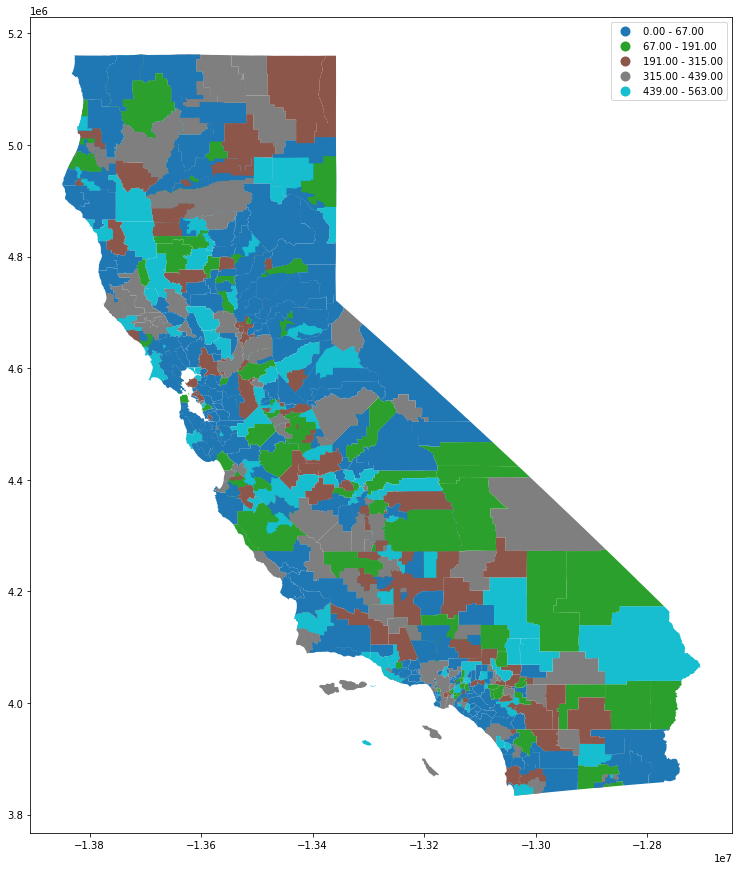

In [13]:
attributes.plot(
    column='concentration_grant',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks"
        )

need to create binary plot (non-null value for concentration grant & null) in following cell. Mapclassify?

## Merging grades

In [14]:
math.head()

,Unnamed: 0,District Code,districtname,studentgroup,currstatus,priorstatus,change,countyname
0,163,61119,Alameda Unified,african_american,-83.9,-82.8,-1.1,Alameda
1,164,61119,Alameda Unified,american_indian,-51.8,-50.0,-1.8,Alameda
2,165,61119,Alameda Unified,all_students,14.3,10.8,3.4,Alameda
3,166,61119,Alameda Unified,asian,43.6,44.8,-1.2,Alameda
4,167,61119,Alameda Unified,english_learners,-13.7,-12.9,-0.9,Alameda


In [15]:
len(math["districtname"].unique())

920

In [16]:
ela.head()

,Unnamed: 0,District Code,districtname,studentgroup,currstatus,priorstatus,change,countyname
0,164,61119,Alameda Unified,african_american,-43.0,-48.7,5.7,Alameda
1,165,61119,Alameda Unified,american_indian,-14.8,14.3,-29.1,Alameda
2,166,61119,Alameda Unified,all_students,36.8,32.8,4.0,Alameda
3,167,61119,Alameda Unified,asian,48.6,54.0,-5.3,Alameda
4,168,61119,Alameda Unified,english_learners,-2.5,-1.4,-1.1,Alameda


In [17]:
len(ela["districtname"].unique())

921

In [18]:
len(attributes['DistrictNa'].unique())

932

In [19]:
ela = ela.rename(columns={'currstatus': 'e_currstatus', 
                          'priorstatus': 'e_priorstatus', 
                          'change' : 'e_change'})
math = math.rename(columns={'currstatus': 'm_currstatus', 
                            'priorstatus': 'm_priorstatus', 
                            'change' : 'm_change'})

In [20]:
grades = ela.merge(math, on=['District Code', 'studentgroup', 'districtname'])
grades

,Unnamed: 0_x,District Code,districtname,studentgroup,e_currstatus,e_priorstatus,e_change,countyname_x,Unnamed: 0_y,m_currstatus,m_priorstatus,m_change,countyname_y
0,164,61119,Alameda Unified,african_american,-43.0,-48.7,5.7,Alameda,163,-83.9,-82.8,-1.1,Alameda
1,165,61119,Alameda Unified,american_indian,-14.8,14.3,-29.1,Alameda,164,-51.8,-50.0,-1.8,Alameda
2,166,61119,Alameda Unified,all_students,36.8,32.8,4.0,Alameda,165,14.3,10.8,3.4,Alameda
3,167,61119,Alameda Unified,asian,48.6,54.0,-5.3,Alameda,166,43.6,44.8,-1.2,Alameda
4,168,61119,Alameda Unified,english_learners,-2.5,-1.4,-1.1,Alameda,167,-13.7,-12.9,-0.9,Alameda
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13596,148816,72769,Wheatland Union High,pacific_islander,NaN,NaN,NaN,Yuba,148683,NaN,NaN,NaN,Yuba
13597,148817,72769,Wheatland Union High,rfep_only,NaN,NaN,NaN,Yuba,148684,NaN,NaN,NaN,Yuba
13598,148818,72769,Wheatland Union High,ses_disad,-28.4,-7.9,-20.6,Yuba,148685,-90.0,-74.0,-16.0,Yuba
13599,148819,72769,Wheatland Union High,disabilities,-150.3,NaN,NaN,Yuba,148686,-226.6,NaN,NaN,Yuba


In [21]:
grades.drop('Unnamed: 0_x', axis=1, inplace=True)
grades.drop('Unnamed: 0_y', axis=1, inplace=True)
grades.drop('countyname_y', axis=1, inplace=True)
grades = grades.rename(columns={'countyname_x' : 'countyname'})

In [22]:
len(grades['districtname'].unique())

920

## Merge grades with attributes

So we will be losing some districts that we do not have grade data for. Let's get a list of those.

In [23]:
s1 = set(attributes['DistrictNa'].unique())
s2 = set(grades["districtname"].unique())


losses = s1.difference(s2)
print(losses)

{'Live Oak', 'Shiloh Elementary', 'Gravenstein Union Elementary', 'Menifee Union', 'Island Union Elementary', 'Coffee Creek Elementary', 'Petaluma City Elementary', 'Ackerman Charter', 'Aromas-San Juan Unified', 'Gazelle Union Elementary', 'New Jerusalem Elementary', 'Santa Rosa Elementary', 'Petaluma Joint Union High', 'Oak Grove Union Elementary', 'Harmony Union Elementary', 'Alvina Elementary', 'Santa Rosa High', 'Los Gatos-Saratoga Union High', 'Oro Grande Elementary', 'Forestville Union Elementary'}


In [24]:
attributes['District Code'] = [x[2:7] for x in attributes['CDSCode'].astype(str)]
# extracting the 'd' from cds codes
grades['District Code'] = grades['District Code'].astype(str)
# enabling merge (str with str)

In [25]:
test = attributes.merge(grades, how='left', on='District Code', left_index=True)
# merging with grades

In [26]:
test
# this looks like it worked?

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictNa,DistrictTy,GradeLow,GradeHigh,GradeLowCe,GradeHighC,AssistStat,CongressUS,SenateCA,AssemblyCA,LocaleDist,UpdateNote,EnrollTota,EnrollChar,EnrollNonC,AAcount,AApct,AIcount,AIpct,AScount,ASpct,FIcount,FIpct,HIcount,HIpct,MRcount,MRpct,PIcount,PIpct,WHcount,WHpct,NRcount,NRpct,ELcount,ELpct,FOScount,FOSpct,HOMcount,HOMpct,MIGcount,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,UPcount,UPpct,ELATested,ELAStdMetP,MathTested,MathStdMet,CCPrepCoho,CCPrepPct,AbsentElig,AbsentPct,GradCohort,GradPct,UCCSUReqMe,DropOutPct,EnrollCumu,SuspPct,SHAPE_Leng,SHAPE_Area,geometry,Unnamed: 0,districtname_x,unduplicated_pupil_count,base_grant,supplemental_grant,concentration_grant,total_grants,cds,District Code,districtname_y,studentgroup,e_currstatus,e_priorstatus,e_change,countyname,m_currstatus,m_priorstatus,m_change
NaN,1,2018-19,0601770,0161119,1611190000000,Alameda,Alameda Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,18,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,11260,1877,9383,825,7.300000,28,0.2,2854,25.299999,683,6.1,1960,17.400000,1310,11.6,67,0.6,3244,28.799999,289,2.6,1601,14.2,26,0.2,67,0.6,0,0.0,1289,11.4,3523,31.299999,3144,33.500000,4567.0,69.400002,4587.0,59.700001,773.0,56.799999,11453.0,9.4,882.0,88.900002,58.900002,5.2,11600.0,2.6,57196.403944,4.733304e+07,"MULTIPOLYGON (((-13606221.352 4540862.002, -13...",10,Alameda Unified,0.3486,"75,938,983","5,294,466",-,"82,158,116",1611190000000,11190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2,2018-19,0601860,0161127,1611270000000,Alameda,Albany City Unified,Unified,KG,12,KG,12,General Assistance,13,09,15,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,3682,0,3682,111,3.000000,4,0.1,1063,28.900000,47,1.3,592,16.100000,510,13.9,6,0.2,1163,31.600000,186,5.1,583,15.8,2,0.1,12,0.3,0,0.0,312,8.5,777,21.100000,1118,30.400000,1773.0,79.199997,1795.0,72.000000,302.0,62.599998,3763.0,6.4,301.0,94.699997,63.900002,1.7,3830.0,1.9,12870.772156,7.161276e+06,"POLYGON ((-13612889.056 4565138.930, -13612894...",16,Albany City Unified,0.2833,"29,644,972","1,679,684",-,"31,352,540",1611270000000,11270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,3,2018-19,0604740,0161143,1611430000000,Alameda,Berkeley Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"12 - City, Midsize",2018-19 District Boundary Adjustment/Correction,10194,383,9811,1440,14.100000,16,0.2,731,7.200000,83,0.8,2438,23.900000,1465,14.4,14,0.1,3999,39.200001,8,0.1,953,9.3,23,0.2,265,2.6,0,0.0,1148,11.3,3331,32.700001,3275,33.400002,4614.0,66.699997,4549.0,61.700001,790.0,63.299999,10404.0,9.7,856.0,87.400002,83.300003,10.7,10534.0,1.4,44426.287405,4.376389e+07,"POLYGON ((-13609481.010 4565073.896, -13609481...",17,Berkeley Unified,0.3519,"78,556,532","5,528,808",-,"89,369,621",1611430000000,11430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,4,2018-19,0607800,0161150,1611500000000,Alameda,Castro Valley Unified,Unified,KG,12,KG,12,General Assistance,"13,15","07,09,10","18,20","21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,9269,0,9269,489,5.300000,19,0.2,2539,27.400000,420,4.5,2204,23.799999,909,9.8,47,0.5,2480,26.799999,162,1.7,1021,11.0,12,0.1,68,0.7,0,0.0,800,8.6,2284,24.600000,2739,29.600000,4844.0,68.099998,4850.0,63.200001,737.0,57.099998,9433.0,7.4,742.0,92.599998,55.900002,3.0,9532.0,2.2,142338.494091,2.833205e+08,"MULTIPOLYGON (((-13581537.591 4528171.452, -13...",19,Castro Valley Unified,0.2904,"74,911,585","4,350,864",-,"79,554,607",1611500000000,11500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,5,2018-19,0612630,0161168,1611680000000,Alameda,Emery Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,743,0,743,326,43.900002,1,0.1,83,11.200000,11,1.5,185,24.900000,62,8.3,8,1.1,67,9.000000,0,0.0,160,21.5,1,0.1,7,0.9,0,0.0,55,7.4,600,80.800003,613,83.099998,376.0,37.099998,377.0,23.299999,40.0,22.500000,760.0,20.5,40.0,100.0

In [27]:
len(test['districtname_x'].unique())

932

In [28]:
test.drop('countyname', axis=1, inplace=True)
test.drop('districtname_x', axis=1, inplace=True)
test.drop('districtname_y', axis=1, inplace=True)
test.drop('Unnamed: 0', axis=1, inplace=True)
test.drop('cds', axis=1, inplace=True)

In [29]:
test.columns

Index(['OBJECTID', 'Year', 'FedID', 'CDCode', 'CDSCode', 'CountyName',
       'DistrictNa', 'DistrictTy', 'GradeLow', 'GradeHigh', 'GradeLowCe',
       'GradeHighC', 'AssistStat', 'CongressUS', 'SenateCA', 'AssemblyCA',
       'LocaleDist', 'UpdateNote', 'EnrollTota', 'EnrollChar', 'EnrollNonC',
       'AAcount', 'AApct', 'AIcount', 'AIpct', 'AScount', 'ASpct', 'FIcount',
       'FIpct', 'HIcount', 'HIpct', 'MRcount', 'MRpct', 'PIcount', 'PIpct',
       'WHcount', 'WHpct', 'NRcount', 'NRpct', 'ELcount', 'ELpct', 'FOScount',
       'FOSpct', 'HOMcount', 'HOMpct', 'MIGcount', 'MIGpct', 'SWDcount',
       'SWDpct', 'SEDcount', 'SEDpct', 'UPcount', 'UPpct', 'ELATested',
       'ELAStdMetP', 'MathTested', 'MathStdMet', 'CCPrepCoho', 'CCPrepPct',
       'AbsentElig', 'AbsentPct', 'GradCohort', 'GradPct', 'UCCSUReqMe',
       'DropOutPct', 'EnrollCumu', 'SuspPct', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry', 'unduplicated_pupil_count', 'base_grant',
       'supplemental_grant', 'concentrati

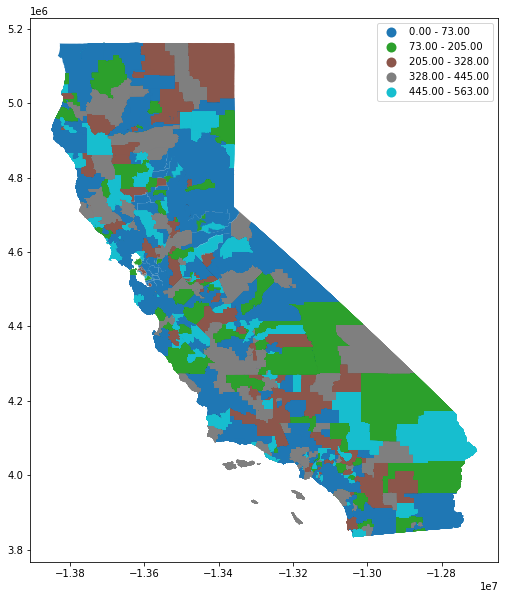

In [30]:
test.plot(column='concentration_grant',
    legend=True,
    figsize=(10, 10),
    scheme="fisher_jenks"
        )

In [31]:
test.to_file('clean_data/master.shp')